# Chapter 13 Convolutional Neural Networks

We'll look at the application of CNNs to images in this chapter, although they can be used for a wide variety of tasks.

## Architecture

Convolutional neural networks add convolutional and pooling layers to the fully connected layers that we've seen in previous chapters, which are both ways of chunking or summarizing lower-level pieces of information. 

## Convolutional Layer

Instead of being connected to every possible input from the previous layer, every neuron takes a multi-dimensional input called its local receptive field. This receptive field is then slid across the original input by a *stride length*, which can be different in each direction, until the entire image has been traversed, and so there is a different neuron for every possible input generated by an image for a given field's dimensions. As we slide over the image, we use the same weights and bias for every neuron, which define a *filter* or a *kernel*. The outputs of these neurons/filters is called a feature map. We can think of filter as a detector for a particular pattern in an image, regardless of where it is located. A convolutional layer is made up of these feature maps, all of which will detect different types of features. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_sample_image

In [2]:
# Get image data
china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

print(dataset.shape)
batch_size, height, width, channels = dataset.shape

(2, 427, 640, 3)


We can use tf.nn.conv2d if we want to pass predefined filters into your convolutional layer.

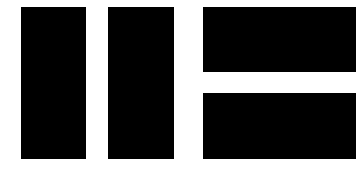

In [3]:
# Create 2 filters [height, width, channels, num_images]
filters = np.zeros(shape=(7, 7, channels, 3), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

# Visualize filters

# first filter, first channel
plt.subplot(121)
plt.imshow(filters[:, :, 0, 0], cmap=plt.cm.gray); 
plt.axis('off')
# second filter, first channel
plt.subplot(122)
plt.imshow(filters[:, :, 0, 1], cmap=plt.cm.gray); 
plt.axis('off');

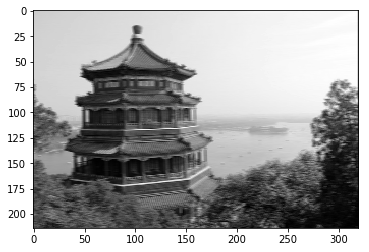

In [4]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
# stride is [1, vertical stride, horizontal stride, 1]
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

plt.imshow(output[0, :, :, 1], cmap="gray"); # plot 1st image's 2nd feature map

tf.layers.Conv2D takes in only the number and size of filters.

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.


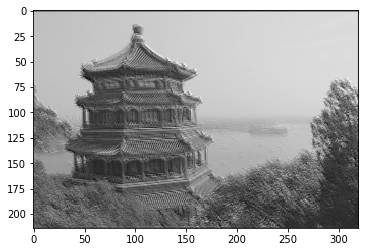

In [5]:
tf.reset_default_graph()

X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
# 'SAME' uses zero padding, 'VALID' uses no padding
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=2,
                        padding="SAME")

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: dataset})
    
plt.imshow(output[0, :, :, 1], cmap="gray"); # plot 1st image's 2nd feature map

## Pooling Layer

Pooling layers, which are also defined by a receptive field, stride, and padding, summarize or shrink the inputs from the previous layer by aggregating all their input values. The most common type is a max pooling layer, which returns the maximum value from the input. Let's create a 2x2 pooling kernel (the same terminology of filter and kernel applies) with a stride value of 2 and no padding.

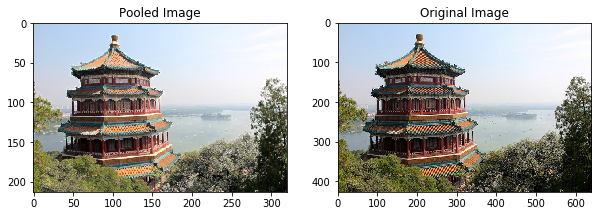

In [6]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels), name='X')
max_pool = tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], 
                         padding='VALID')

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})
    
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(output[0].astype(np.uint8))
plt.title('Pooled Image')
plt.subplot(122)
plt.imshow(china)
plt.title('Original Image');